In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.odr import *
from scipy import linalg
from scipy import stats
from scipy import optimize
import time
from tqdm.notebook import tqdm
All = pd.read_csv(r'C:/Users/wlsdl/OneDrive/바탕 화면/Jin/White Dwarf/all.txt',delim_whitespace=True,header=0)
plt.rcParams['font.size'] = '16'
T,R,M,Rerr, Merr,Terr = All['Teff'].to_numpy(),All['Radius'].to_numpy() ,All['Mass'].to_numpy() ,All['Rerr'].to_numpy() ,All['Merr'].to_numpy(),All['Terr'].to_numpy()
g = All['g_mag'].to_numpy()

Object = All['Object'].to_numpy()

Ts = 5800  # K ,Sun effective temperature 

log_R =np.log10(R)   # Radius of white dwarf represented by sun radius
log_M = np.log10(M)  # Mass of white dwarf represented by sun mass
log_T = np.log10(T)   # Temperature of white dwarf 

logR_err = (1/np.log(10))*(Rerr/R)   

logM_err =(1/np.log(10))*(Merr/M)
logT_err = (1/np.log(10))*(Terr/T)

h_bar = 1.054e-34  # m^2 kg / s ,Plank cons / 2 pi
G = 6.6743e-11       # m^3 /kg / s^2 , Gravitational cons
me = 9.109387e-31  # Kg , Electron mass
mp = 1.6726e-27   # Kg , Proton mass
pi = np.pi
m_s = 1.9884e30   #Kg , Sun mass 
r_s =  696340e3   # m, Sun radius
ev = 6.242e18 #J -> eV
kb_J = 1.38e-23
kb_eV = 8.6173303e-5 

kk_e = ((81*pi**2*h_bar**6)/(16*G**3*me**3))**(1/3)  # constant  
kk_p = ((81*pi**2*h_bar**6)/(16*G**3*mp**3))**(1/3)

In [21]:
#convert time to a color tuple using the colormap used for scatter

import matplotlib
import matplotlib.cm as cm
norm = matplotlib.colors.Normalize(vmin=min(T), vmax=max(T), clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap='rainbow')
time_color = np.array([(mapper.to_rgba(v)) for v in T])

def Rel_2(M,T,alpha,beta,T0,R_0):
    R = 10**R_0*M**alpha*(1+T/T0)**beta
    return R

R_chi= -2.208819587
alpha_chi= -0.9961488722
beta_chi = 0.40867598437
T0_chi= 18686.041814


R_std = -2.2141590738
alpha_std = - 0.9645674373
beta_std = 0.3747801593
T0_std = 15397.38418665

xx = np.linspace(M.min()-0.1,M.max()+0.11,100)
R2_chi = Rel_2(xx,0,alpha_chi,beta_chi,T0_chi,R_chi)
R2_std = Rel_2(xx,0,alpha_std,beta_std,T0_std,R_std)

time_color = plt.cm.rainbow((T - T.min()) / (T.max() - T.min()))

0.010271846739702589


C:\Users\wlsdl\AppData\Local\Temp\ipykernel_1992\3319187457.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('rainbow')


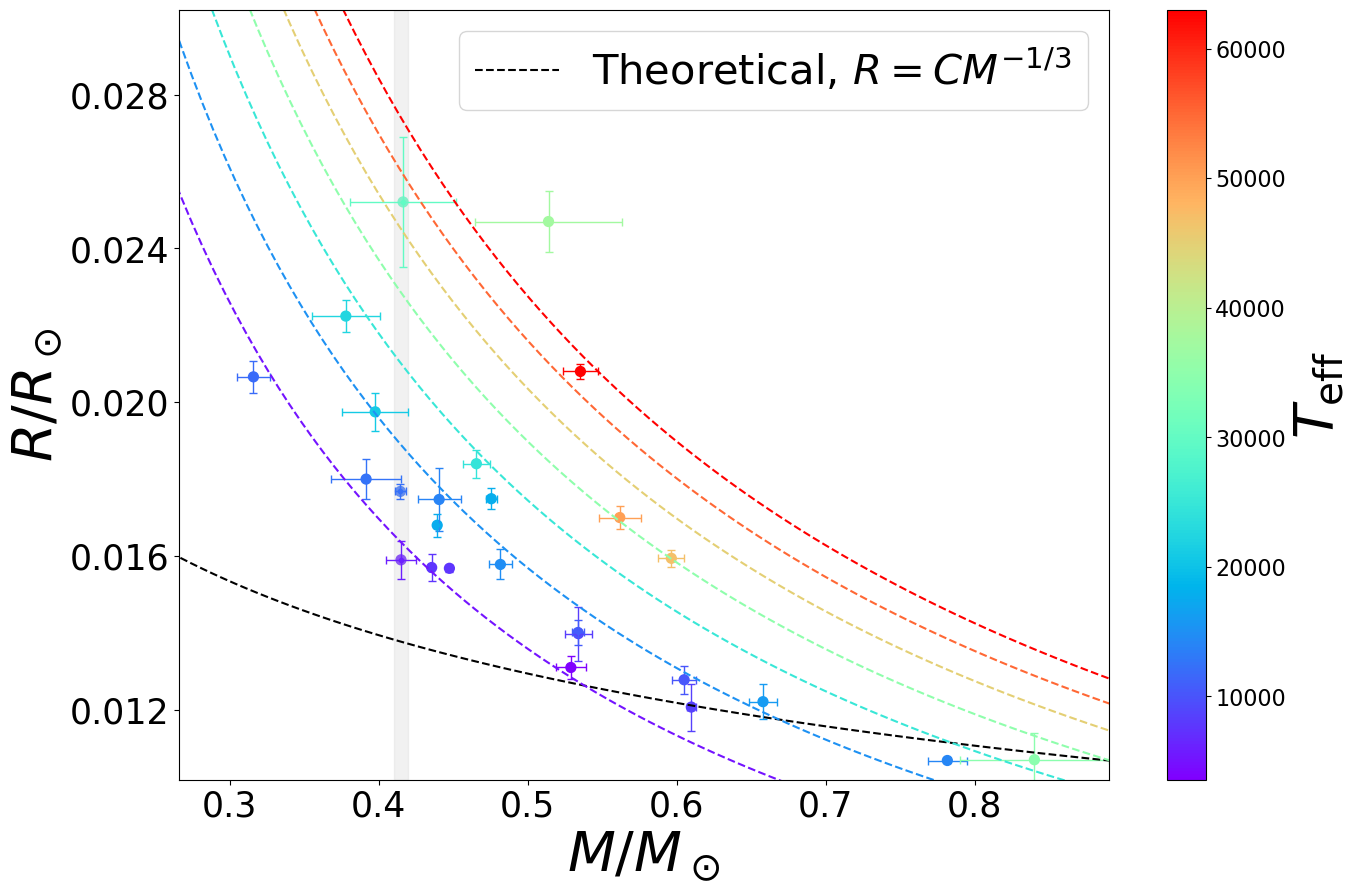

In [26]:
fig = plt.figure(1,figsize=(15,10))

for x, y, Me,Re,color in zip(M, R, Merr, Rerr,time_color):
    plt.plot(x, y, '.', color=color)
    plt.errorbar(x, y, xerr= Me,yerr=Re ,lw=1, capsize=3, color=color)

cm = plt.cm.get_cmap('rainbow')
sc = plt.scatter(M, R, c=T, vmin=T.min(), vmax=T.max(), s=50, cmap=cm)

colorbar = plt.colorbar(sc)
label = colorbar.set_label('$ T_\mathrm{eff}$', size=40) 
plt.xlabel(r"$M / M_\odot$",fontsize=40)
plt.ylabel(r'$R/R_\odot$',fontsize=40)
plt.ylim(R.min()-0.0005 , R.max()+0.005)
plt.yticks(np.linspace(0.012,0.028,5))
plt.xticks(np.arange(0.3,0.9,0.1))
plt.xlim(M.min()-0.05,M.max()+0.05)
TT = np.linspace(5000,65000,7)
def EOS(m,z):
    aa = (m_s)**(-1/3) / r_s
    pp = aa*kk_e*mp**(-5/3)
    k = pp*z**(5/3)
    print(k)
    return k * m **(-1/3)
# xx = np.linspace(M.min(),M.max(),100)
yy_th = EOS(xx,0.5) 
# yy_th = 0.01 *(xx)**(-1/3)
plt.plot(xx,yy_th,'k--',label=r'Theoretical, $R = C M^{-1/3}$') # ,label=r'Theoretical, $R = C M^{-1/3}$'
# TT = np.append(5000,TT)
for i in TT:
    color = cm((i - T.min()) / (T.max() - T.min()))  # 컬러맵에서 색상 가져오기
    R2_chi = Rel_2(xx, i, alpha_chi, beta_chi, T0_chi, R_chi)
    plt.plot(xx, R2_chi, linestyle='--', color=color)

xx_g = np.linspace(0.41,0.42,100)
legend = plt.legend(fontsize=30,loc='upper right')
plt.tick_params(axis='x', labelsize=25)
plt.tick_params(axis='y', labelsize=25)
plt.fill_between(xx_g, R.min()-0.0005, R.max()+0.005, color='lightgray', alpha=0.3)







0.010271846739702589


C:\Users\wlsdl\AppData\Local\Temp\ipykernel_1992\2373804254.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('rainbow')


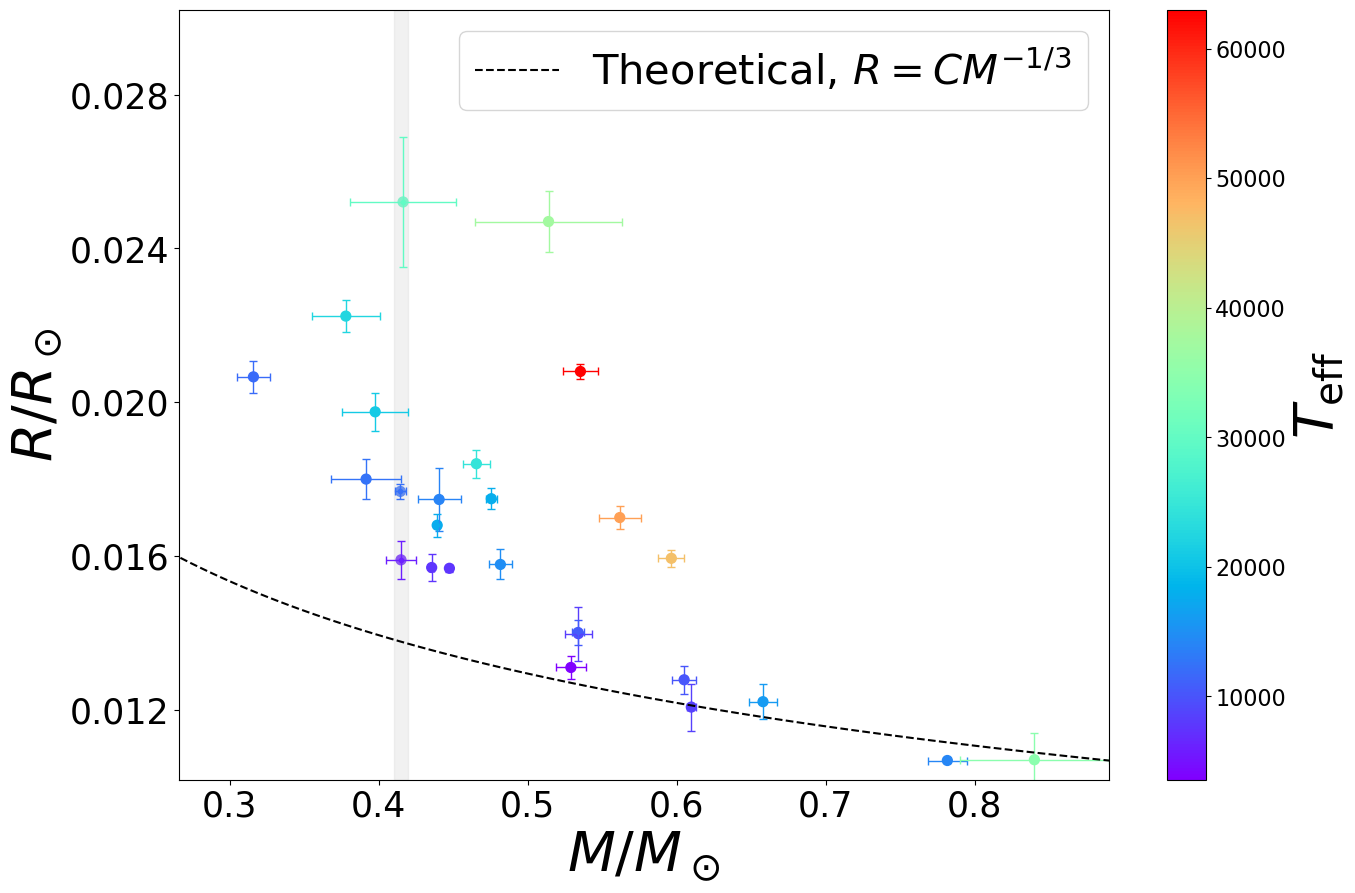

In [25]:
#convert time to a color tuple using the colormap used for scatter
fig = plt.figure(1,figsize=(15,10))


import matplotlib
import matplotlib.cm as cm
norm = matplotlib.colors.Normalize(vmin=min(T), vmax=max(T), clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap='rainbow')
time_color = np.array([(mapper.to_rgba(v)) for v in T])

#loop over each data point to plot
for x, y, Me,Re,color in zip(M, R, Merr, Rerr,time_color):
    plt.plot(x, y, '.', color=color)
    plt.errorbar(x, y, xerr= Me,yerr=Re ,lw=1, capsize=3, color=color)

cm = plt.cm.get_cmap('rainbow')
sc = plt.scatter(M, R, c=T, vmin=T.min(), vmax=T.max(), s=50, cmap=cm)

colorbar = plt.colorbar(sc)
label = colorbar.set_label('$T_\mathrm{eff}$', size=40) 
plt.xlabel(r"$M / M_\odot$",fontsize=40)
plt.ylabel(r'$R/R_\odot$',fontsize=40)
plt.ylim(R.min()-0.0005 , R.max()+0.005)
plt.yticks(np.linspace(0.012,0.028,5))
plt.xticks(np.arange(0.3,0.9,0.1))
plt.xlim(M.min()-0.05,M.max()+0.05)
def EOS(m,z):
    aa = (m_s)**(-1/3) / r_s
    pp = aa*kk_e*mp**(-5/3)
    k = pp*z**(5/3)
    print(k)
    return k * m **(-1/3)
xx = np.linspace(M.min()-0.1,M.max()+0.1,100)
yy_th = EOS(xx,0.5) 
# yy_th = 0.01 *(xx)**(-1/3)
plt.plot(xx,yy_th,'k--',label=r'Theoretical, $R = C M^{-1/3}$')

# yy_th = EOS(kk_p,xx,0.5) 
# yy_th = 0.01 *(xx)**(-1/3)
# plt.plot(xx,yy_th,'k:',label=r'Theoretical, $R = C M^{-1/3}$')


xx_g = np.linspace(0.41,0.42,100)
plt.tick_params(axis='x', labelsize=25)
plt.tick_params(axis='y', labelsize=25)
legend = plt.legend(fontsize=30,loc='upper right')
plt.fill_between(xx_g, R.min()-0.0005, R.max()+0.005, color='lightgray', alpha=0.3)

# plt.savefig("/home/jin/바탕화면/Theorical expected")

0.010271846739702589


C:\Users\wlsdl\AppData\Local\Temp\ipykernel_28976\2023101359.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('rainbow')


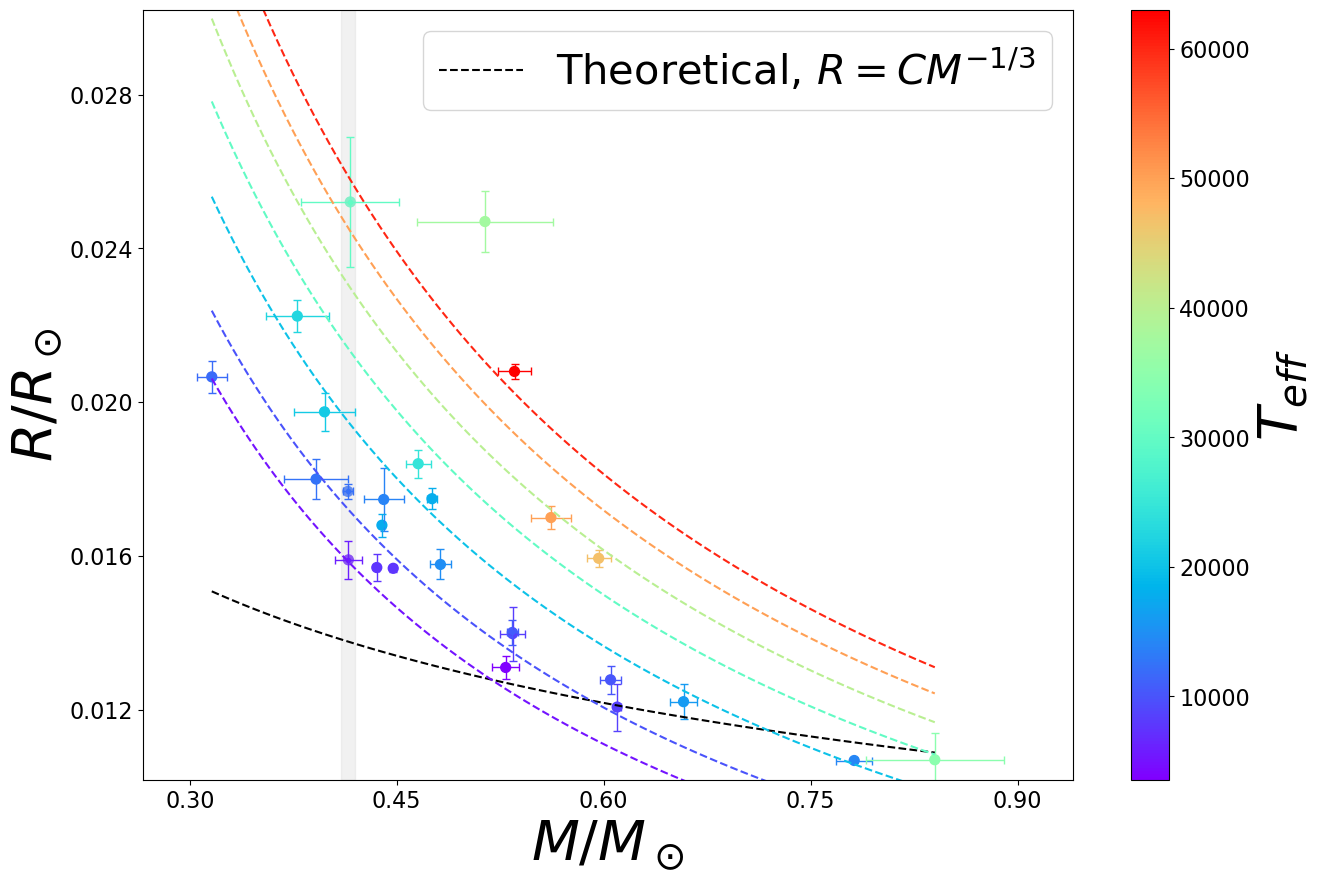

In [7]:
fig = plt.figure(1,figsize=(15,10))

for x, y, Me,Re,color in zip(M, R, Merr, Rerr,time_color):
    plt.plot(x, y, '.', color=color)
    plt.errorbar(x, y, xerr= Me,yerr=Re ,lw=1, capsize=3, color=color)

cm = plt.cm.get_cmap('rainbow')
sc = plt.scatter(M, R, c=T, vmin=T.min(), vmax=T.max(), s=50, cmap=cm)

colorbar = plt.colorbar(sc)
label = colorbar.set_label('$T_{eff}$', size=40) 
plt.xlabel(r"$M / M_\odot$",fontsize=40)
plt.ylabel(r'$R/R_\odot$',fontsize=40)
plt.ylim(R.min()-0.0005 , R.max()+0.005)
plt.yticks(np.linspace(0.012,0.028,5))
plt.xticks(np.arange(0.3,0.9,0.15))
plt.xlim(M.min()-0.05,M.max()+0.1)
TT = np.linspace(5000,65000,7)
def EOS(m,z):
    aa = (m_s)**(-1/3) / r_s
    pp = aa*kk_e*mp**(-5/3)
    k = pp*z**(5/3)
    print(k)
    return k * m **(-1/3)
# xx = np.linspace(M.min(),M.max(),100)
yy_th = EOS(xx,0.5) 
# yy_th = 0.01 *(xx)**(-1/3)
plt.plot(xx,yy_th,'k--',label=r'Theoretical, $R = C M^{-1/3}$') # ,label=r'Theoretical, $R = C M^{-1/3}$'
TT = np.linspace(10000,60000,6)
TT = np.append(5000,TT)
for i in TT:
    color = cm((i - T.min()) / (T.max() - T.min()))  # 컬러맵에서 색상 가져오기
    R2_std = Rel_2(xx, i, alpha_std, beta_std, T0_std, R_std)
    plt.plot(xx, R2_std, linestyle='--', color=color)

xx_g = np.linspace(0.41,0.42,100)
legend = plt.legend(fontsize=30,loc='upper right')
plt.fill_between(xx_g, R.min()-0.0005, R.max()+0.005, color='lightgray', alpha=0.3)







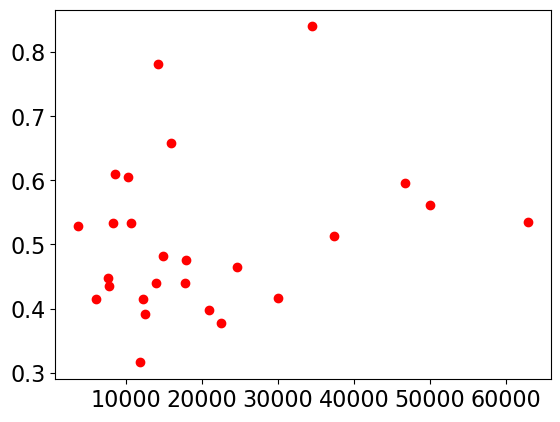